In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
%matplotlib inline

#### I. Study the Apriori algorithm data mining and how it discovers items that are frequently associated together, for Market Basket Analysis. [25 points]
*__http://software.ucv.ro/~cmihaescu/ro/teaching/AIR/docs/Lab8-Apriori.pdf
page 1 -2 (small dataset from Supermarket: Transaction ID/ milk /Bread /butter /beer/ Conduct Market Basket Analysis on the same market data set using Python.  Explain the data context and results adequately.__*

In [3]:
df = pd.read_csv('mrktransdata.csv')
df.set_index('TranID', inplace=True)
df

,Milk,Bread,Butter,Beer
TranID,,,,
1,1,1,0,0
2,0,1,1,0
3,0,0,0,1
4,1,1,1,0
5,0,1,0,0
6,1,0,0,0
7,0,1,1,1
8,1,1,1,1
9,0,1,0,1


In [4]:
item_cnt = []

# counting item frequency
for item in df.columns:
    item_cnt.append(df[item].sum())
L1 = pd.DataFrame(item_cnt, index=df.columns, columns=['Count'])
L1

,Count
Milk,9
Bread,10
Butter,7
Beer,6


In [5]:
# setting minSupp
tot_trans = df.shape[0]
minSupp = np.floor(tot_trans / 3)
minSupp

5.0

In [6]:
# dropping items with frequency < minSupp
for idx in L1.index:
    if(L1.loc[idx][0] < minSupp):
        L1.drop(idx, inplace=True)

L1

,Count
Milk,9
Bread,10
Butter,7
Beer,6


In [7]:
# calculating supp for each of the remaining item
L1['Supp'] = L1.Count / tot_trans
L1

,Count,Supp
Milk,9,0.600000
Bread,10,0.666667
Butter,7,0.466667
Beer,6,0.400000


In [8]:
# creating item pairs
L2 = [[x, y] for x in list(L1.index) for y in list(L1.index) if x!= y]
L2 = pd.DataFrame(L2, columns=['x', 'y'])
L2

,x,y
0,Milk,Bread
1,Milk,Butter
2,Milk,Beer
3,Bread,Milk
4,Bread,Butter
5,Bread,Beer
6,Butter,Milk
7,Butter,Bread
8,Butter,Beer
9,Beer,Milk


In [9]:
# counting frequency of item pairs in transactions
cnt_lst = []
for idx in L2.index:
    part_df = df[L2.loc[idx]]
    n = 0
    for p_idx in part_df.index:
        if(all(part_df.loc[p_idx])):
            n = n + 1
    cnt_lst.append(n)

L2['Count'] = cnt_lst

In [10]:
# dropping counts that are less than minSupp
for idx in L2.index:
    if(L2.loc[idx]['Count'] < minSupp):
        L2.drop(idx, inplace=True)

L2

,x,y,Count
0,Milk,Bread,6
1,Milk,Butter,5
3,Bread,Milk,6
4,Bread,Butter,6
6,Butter,Milk,5
7,Butter,Bread,6


In [11]:
# creating 3-item groups
x = L2['x']
y = L2['y']
z = list(L1.index)

L3 = [[x, y, z] for x in L2['x'] for y in L2['y'] for z in list(L1.index) if x!=z and y!=z and x!=y]
L3 = pd.DataFrame(L3, columns=['x', 'y', 'z'])

In [12]:
# counting frequency of 3-item groups
cnt_lst = []
for idx in L3.index:
    part_df = df[L3.loc[idx]]
    n = 0
    for p_idx in part_df.index:
        if(all(part_df.loc[p_idx])):
            n = n + 1
    cnt_lst.append(n)

L3['Count'] = cnt_lst

In [13]:
L3.head(20)

,x,y,z,Count
0,Milk,Bread,Butter,4
1,Milk,Bread,Beer,2
2,Milk,Butter,Bread,4
3,Milk,Butter,Beer,2
4,Milk,Butter,Bread,4
5,Milk,Butter,Beer,2
6,Milk,Bread,Butter,4
7,Milk,Bread,Beer,2
8,Milk,Bread,Butter,4
9,Milk,Bread,Beer,2


In [14]:
# dropping counts that are less than minSupp
for idx in L3.index:
    if(L3.loc[idx]['Count'] < minSupp):
        L3.drop(idx, inplace=True)

L3.head()

,x,y,z,Count


* There are no three-item lines that exceed minSupp
* stop here and revisit two item table

In [15]:
L2

,x,y,Count
0,Milk,Bread,6
1,Milk,Butter,5
3,Bread,Milk,6
4,Bread,Butter,6
6,Butter,Milk,5
7,Butter,Bread,6


In [16]:
# joining supp(x) and supp(y) from one-item df, L1
L2 = L2.join(L1.Supp.rename('SuppX'), on='x')
L2 = L2.join(L1.Supp.rename('SuppY'), on='y')

In [17]:
# adding two-item pair supp info to df
L2['Supp(X_Y)'] = L2.Count/tot_trans
L2

,x,y,Count,SuppX,SuppY,Supp(X_Y)
0,Milk,Bread,6,0.600000,0.666667,0.400000
1,Milk,Butter,5,0.600000,0.466667,0.333333
3,Bread,Milk,6,0.666667,0.600000,0.400000
4,Bread,Butter,6,0.666667,0.466667,0.400000
6,Butter,Milk,5,0.466667,0.600000,0.333333
7,Butter,Bread,6,0.466667,0.666667,0.400000


In [18]:
# showing confidence and lift information of each two-item pair
L2['Conf'] = L2['Supp(X_Y)']/L2.SuppX
L2['Lift'] = L2['Supp(X_Y)']/(L2.SuppX * L2.SuppY)
L2[['x','y','Conf','Lift']]

,x,y,Conf,Lift
0,Milk,Bread,0.666667,1.000000
1,Milk,Butter,0.555556,1.190476
3,Bread,Milk,0.600000,1.000000
4,Bread,Butter,0.600000,1.285714
6,Butter,Milk,0.714286,1.190476
7,Butter,Bread,0.857143,1.285714


*_The table above shows the Confidence and Lift of X --> Y_*

* Since the Lift values are all >= 1, items listed under x are likely to be bought together with items listed under y

##### II. Define Sensitivity and Specificity of a Classifier. How does a ROC curve assess the performance of a Classifier? Explain using a diagram, and the below data plotted as ROC.

* Sensitivity: rate of true positive, TP/P, the ability to detect postive correctly
* Specificity: rate of true negative, TN/N, the ability to rule out negative correctly

* ROC curve assesses the performance of a classifer by plotting out the true postive rate (y-axis) against the false postive rate (x-axis), or sensitity / (1 - specificity), at a number of different thresholds

In [19]:
virus = pd.read_csv('virusinfo.csv')
virus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
setting          6 non-null object
virus_deteced    6 non-null float64
correct_id       6 non-null float64
dtypes: float64(2), object(1)
memory usage: 224.0+ bytes


In [20]:
virus['FPR'] = 1-virus['correct_id']
virus

,setting,virus_deteced,correct_id,FPR
0,off,0.00,1.00,0.00
1,s1,0.35,0.93,0.07
2,s2,0.60,0.85,0.15
3,s3,0.85,0.70,0.30
4,s4,0.92,0.30,0.70
5,full,1.00,0.00,1.00


Text(0.5, 1.0, 'ROC Curve')

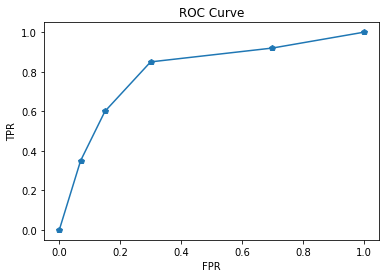

In [21]:
# plotting ROC curve using TPR (virus_detected) and FPR
plt.plot(virus.FPR, virus.virus_deteced, 'p-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

*_Observation:_*

* As the number of overall positive detections increases, the number of false positive detections increases as well

##### III. Use the mtcars data, implement ROC and AUC for comparison of Classifiers. Ref tutorial:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [22]:
mtcars = pd.read_csv('mtcars.csv')

In [23]:
# binning MPG into three categories: efficient, moderate, gas guzzler
mtcars['mpg_eff'] = pd.cut(mtcars.mpg, bins=3, labels=['eff', 'mod', 'gzlr'])

In [24]:
mtcars.head(10)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_eff
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,mod
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,mod
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,mod
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,mod
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,mod
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,eff
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,eff
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,mod
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,mod
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,mod


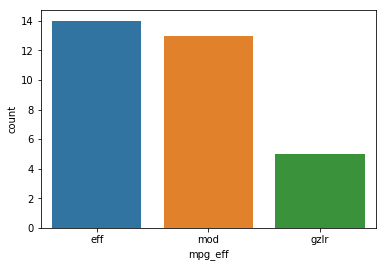

In [25]:
# plotting count of each category of fuel efficiency group
sns.countplot(mtcars.mpg_eff)

In [26]:
# binarize response for OneVsRestClassifier
from sklearn.preprocessing import label_binarize

y = label_binarize(mtcars.mpg_eff, classes=['eff', 'mod', 'gzlr'])
n_classes = y.shape[1]

In [27]:
# converting discrete vars into categorical
mtcars[['cyl', 'vs', 'am', 'gear', 'carb']] = mtcars[['cyl', 'vs', 'am', 'gear', 'carb']].apply(lambda x: x.astype('category'))

In [28]:
X = mtcars['disp hp drat wt qsec'.split()]

# creating dummies for each of the five categorical vars
for var in 'cyl vs am gear carb'.split():
    X = pd.concat([X, pd.get_dummies(mtcars[var], drop_first=True)], axis=1)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from itertools import*

In [30]:
# creating train test groups for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777)

# creating an instance of OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=555))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [31]:
FPR = dict()
TPR = dict()
roc_auc = dict()

# getting FPR and TPR for each class of fuel effiency
for i in range(n_classes):
    FPR[i], TPR[i], thresh = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(FPR[i], TPR[i])

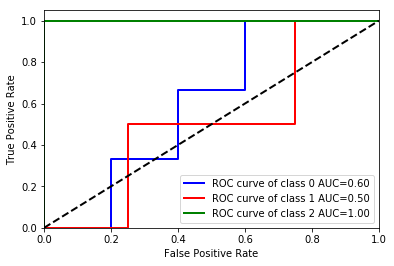

In [32]:
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(FPR[i], TPR[i], color=color, lw=2, label="ROC curve of class {0} AUC={1:0.2f}".format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

##### IV. Study Dr. Hiroshi’s article on Naïve Bayes classification on Fish data and ISLR LDA section.
##### a.) What is LDA classification, how does it work? How is it different from the Naive Bayes Classification?


Linear discriminant analysis is both a dimensionality reduction and a classification technique that's suitable for dataset that are well-separated and often entails more than two classes of categorization

The goal of Linear Discriminant Analysis is to project the features in higher dimension space onto a lower dimensional space, and there are three steps involved:

* a.) calculate the separability between different classes (between class variance)

* b.) calculate the distance between the class mean and sample of each class (within class variance)

* c.) construct the lower dimensional space that maximizes the between class variance and minimizes the within class variance

Both LDA and NB are linear classifiers and generative models, but they differ in assumptions about the dataset.

* LDA: assumes data are normally distributed wthin each class, and all classes share the same var-cov matrix
* NB: assumes data within each class of the dataset are independent from one another

##### b.) Convert the Data Table 1: Example fish lengths for male and female from Dr. Hiroshi's paper on Naive Bayes into a dataframe, and conduct an LDA classification using Python Mass library. Follow this tutorial:
https://freakonometrics.hypotheses.org/53021

In [33]:
# read in fish length data from csv
df = pd.read_csv('fishstats.csv', header=None)

# reshaping data using matrix then casting to df
df = pd.DataFrame(np.reshape(df.values, (21, 5)))

In [34]:
# resetting df header names
colnames = df.iloc[0].values.tolist()
df.columns = colnames
df.drop(0, inplace=True)

In [35]:
# reformatting column data type
df[['nMale(x)', 'P(x|M)', 'nFemale(x)', 'P(x|F)']] = df[['nMale(x)', 'P(x|M)', 'nFemale(x)', 'P(x|F)']].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 5 columns):
x             20 non-null object
nMale(x)      20 non-null float64
P(x|M)        20 non-null float64
nFemale(x)    20 non-null float64
P(x|F)        20 non-null float64
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [36]:
# reformatting data for ML algorithm
fish_data = []

len = 1
for n in df['nMale(x)'].iloc[:20]:
    while n > 0:
        fish_data.append([len, 'M'])
        n = n - 1
    len = len + 1
    
len = 1
for n in df['nFemale(x)'].iloc[:20]:
    while n > 0:
        fish_data.append([len, 'F'])
        n = n - 1
    len = len + 1

In [37]:
fish_df = pd.DataFrame(fish_data, columns=['length', 'gender'])
fish_df.head(10)

,length,gender
0,5,M
1,6,M
2,6,M
3,7,M
4,7,M
5,8,M
6,8,M
7,9,M
8,9,M
9,9,M


In [38]:
from sklearn.preprocessing import*

X = fish_df.length.values
# reshaping for single feature
X = X.reshape(-1,1)

# recode labels in y for ML algorithm
y = fish_df.gender.values

y = LabelEncoder().fit(y).transform(y)

label_dict = {1:'M', 0:'F'}

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

sklearn_lda = LDA()

# for prediction
sklearn_lda.fit(X, y)

# for dimensionality reduction
X_lda = sklearn_lda.fit_transform(X, y)

In [40]:
pred_y = sklearn_lda.predict(fish_df.length.values.reshape(-1,1))

fish_df['pred_gender'] = [label_dict[i] for i in pred_y]
fish_df.sort_values('length', inplace=True)
fish_df

,length,gender,pred_gender
101,4,F,F
100,4,F,F
0,5,M,F
102,5,F,F
103,5,F,F
104,5,F,F
105,5,F,F
106,5,F,F
107,5,F,F
108,5,F,F
